In [70]:
import pyspark.sql.types as T 
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline  

In [71]:
businessDF_raw = spark.read.json("business.json")
reviewDF_raw =  spark.read.json("review.json")
userDF_raw =  spark.read.json("user.json")

In [72]:
businessDF_raw.createOrReplaceTempView("business_raw")
reviewDF_raw.createOrReplaceTempView("review_raw")
userDF_raw.createOrReplaceTempView("user_raw")

In [118]:
businessDF = spark.sql("""
SELECT business_id as bus_id, name, city, state, stars as bus_stars, review_count as ResReview_count, is_open, attributes,categories, hours  FROM business_raw
""")
reviewDF = spark.sql("""SELECT review_id, user_id as u_id, business_id,stars as rev_stars,date FROM review_raw
""")
userDF = spark.sql("""
SELECT user_id, name, review_count as UserReview_count, yelping_since, friends, average_stars from user_raw """)

In [119]:
businessDF.createOrReplaceTempView("business")
reviewDF.createOrReplaceTempView("review")
userDF.createOrReplaceTempView("user")

In [120]:
combineDF = spark.sql(""" SELECT * FROM review
INNER JOIN   business  ON business.bus_id = review.business_id
INNER JOIN  user ON user.user_id = review.u_id
""")

In [121]:
combineDF.createOrReplaceTempView("combine")

spark.sql("""
SELECT * FROM combine
LIMIT 5
""").toPandas()

,review_id,u_id,business_id,rev_stars,date,bus_id,name,city,state,bus_stars,...,is_open,attributes,categories,hours,user_id,name,UserReview_count,yelping_since,friends,average_stars
0,TbU3S2kWmfajlVov3I9EKw,-1KKYzibGPyUX-MwkBTlrg,L772e6l2Yd0DJEyCBxBNng,4.0,2014-09-19 01:12:10,L772e6l2Yd0DJEyCBxBNng,State Street Brats,Madison,WI,3.0,...,1,"(None, None, u'full_bar', {'romantic': False, ...","Sports Bars, Restaurants, American (Traditiona...","(11:0-2:0, 11:0-2:0, 11:0-2:0, 11:0-2:0, 11:0-...",-1KKYzibGPyUX-MwkBTlrg,Nickie,163,2009-08-07 13:42:19,"4NKTLRuxT5etbNOK53QL3w, a3riT5uvhETcvHssPUEPWQ...",4.00
1,AF7_icUaLQVgj7d29xdYmw,-1zQA2f_syMAdA04PUWNNw,sAS4fHDiK8A9a1wEAj4S3w,1.0,2014-08-28 01:31:40,sAS4fHDiK8A9a1wEAj4S3w,MD Wireless Smartphone Repair,Las Vegas,NV,4.0,...,1,"(None, None, None, None, None, None, None, Non...","Personal Assistants, Mobile Phone Repair, IT S...","(10:0-19:0, 10:0-19:0, 10:0-19:0, None, 10:0-1...",-1zQA2f_syMAdA04PUWNNw,Zach,7,2014-06-22 02:44:41,"J-lQl_8bKKojp32Jb3H2Rg, fFxOSG41WngPfdurA4l8Ag...",3.29
2,08j8zUlyJylKcJa_rIeB-w,-1zQA2f_syMAdA04PUWNNw,aNe8ofTYrealxqv7VtFTuw,5.0,2016-07-29 19:44:01,aNe8ofTYrealxqv7VtFTuw,Sierra Gold,Las Vegas,NV,3.5,...,1,"(None, None, u'full_bar', {'romantic': False, ...","Pubs, Sports Bars, Pizza, Nightlife, Food, Bre...","(0:0-0:0, 0:0-0:0, 0:0-0:0, 0:0-0:0, 0:0-0:0, ...",-1zQA2f_syMAdA04PUWNNw,Zach,7,2014-06-22 02:44:41,"J-lQl_8bKKojp32Jb3H2Rg, fFxOSG41WngPfdurA4l8Ag...",3.29
3,yegncED90TID9lW3GwBE2Q,-3i9bhfvrM3F1wsC9XIB8g,yNVcnSaMSrTmjJBMrHTy9w,3.0,2007-03-27 20:22:15,yNVcnSaMSrTmjJBMrHTy9w,Battista's Hole In the Wall,Las Vegas,NV,3.5,...,1,"(None, None, u'full_bar', {'romantic': False, ...","Bars, Restaurants, Nightlife, Italian, Wine Bars","(17:0-22:45, 17:0-22:15, 17:0-22:45, 17:0-22:1...",-3i9bhfvrM3F1wsC9XIB8g,Linda,652,2005-08-07 03:08:12,"9YLROKnskYk3OVZosiwC7A, lWJXYN7J7jMpF12izhGJmQ...",4.07
4,P1K77IxkrLC--nFkDVC4cg,-3i9bhfvrM3F1wsC9XIB8g,GtHu9uGXpn7Jg_Z7vFKZKw,4.0,2016-01-01 05:34:49,GtHu9uGXpn7Jg_Z7vFKZKw,Meatball Spot,Las Vegas,NV,3.5,...,0,"(None, None, 'none', {'romantic': False, 'inti...","American (New), Restaurants, Italian",None,-3i9bhfvrM3F1wsC9XIB8g,Linda,652,2005-08-07 03:08:12,"9YLROKnskYk3OVZosiwC7A, lWJXYN7J7jMpF12izhGJmQ...",4.07


In [122]:
#combineDF.describe().toPandas()

In [123]:
citycombineDF = spark.sql("""
SELECT * FROM combine
WHERE categories like 'Restau%' and ( city like 'Toron%' or city like 'Markha%' or city like 'Mississau%' 
or city like 'North York%' or city like 'Richmond Hil%')""")


In [163]:
citycombine2 = citycombineDF.toPandas()
citycombine2.to_csv("city combine.csv")  


In [125]:
citycombineDF.createOrReplaceTempView("citycombine")

In [126]:
citycombineDF.describe().toPandas()

,summary,review_id,u_id,business_id,rev_stars,date,bus_id,name,city,state,bus_stars,ResReview_count,is_open,categories,user_id,name,UserReview_count,yelping_since,friends,average_stars
0,count,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047,45047
1,mean,None,None,None,3.575132639243457,None,None,229.0,None,None,3.5510799831287323,144.92982884542812,0.8021621861611206,None,None,None,228.0255732901192,None,None,3.61555020312118
2,stddev,None,None,None,1.1609140880508113,None,None,0.0,None,None,0.5437292106250926,145.88746014511867,0.39837361392986176,None,None,None,600.038936018167,None,None,0.4732182279202408
3,min,--0zXw3_ZjcRXPo3CRBKQw,--7gjElmOrthETJ8XqzMBw,-AVRReI-nfsa0lKlehEojw,1.0,2008-08-06 23:04:28,-AVRReI-nfsa0lKlehEojw,180 Secondi,Markham,BC,1.0,3,0,Restaurants,--7gjElmOrthETJ8XqzMBw,.,1,2005-03-04 04:26:12,"--Qh8yKWAvIP4V4K8ZPfHA, oGjHvq_gGA1liPultrPwOw...",1.0
4,max,zzd6yae3FNXoXHOjQrDn_A,zzo--VpSQh8PpsGVeMC1dQ,zxWbNs31PLO0DKBTY4L4Ig,5.0,2018-11-14 17:43:19,zxWbNs31PLO0DKBTY4L4Ig,z-teca Gourmet Burritos,Toronto,ON,5.0,700,1,"Restaurants, Women's Clothing, Cuban, Fashion,...",zzo--VpSQh8PpsGVeMC1dQ,Ôdré,7750,2018-09-30 12:30:23,"zzltQbbtriSWWdNINMzJUw, jfgdYDS1h5Io4zfAxsoKfQ...",5.0


In [127]:
#user EDA
spark.sql("""
SELECT COUNT(DISTINCT review_id) ReviewCount, COUNT(DISTINCT business_id) BusinessCount, COUNT(DISTINCT user_id) UserCount FROM citycombine
""").toPandas()

,ReviewCount,BusinessCount,UserCount
0,45047,1798,12039


In [128]:
userProfileDF = spark.sql("""
SELECT DISTINCT user_id, UserReview_count, Yelping_since, friends, average_stars FROM citycombine
""")

In [129]:
userProfileDF.createOrReplaceTempView("userProfile")

spark.sql("""
SELECT * FROM userProfile
LIMIT 10
""").toPandas()

,user_id,UserReview_count,Yelping_since,friends,average_stars
0,0LUt7xSvYgLpL0zBezI5QA,17,2015-05-17 22:45:50,"vRIy03B-RojFB-pwpWECVw, VUPQF1XuNBv1gfCv7lyv7Q...",4.00
1,31nz8urmYS2uogLPWZnx7Q,112,2013-09-27 00:29:03,"jq4k1GUc4DV_te_i1pOzQA, r6_B9482C89MQhKvthrtAA...",3.88
2,47NAV-86kgFEuIWT3Y9o-A,1,2016-08-22 01:05:41,"NZ2trqLpx_E01DGlNzk6Bw, 6RUSbHGH0RlNVnrNmXuTbg...",4.00
3,6J0mGxAaPuHAPj8ShjOCag,58,2011-04-02 01:22:38,"FRe2ylKTM2DajzvaUp0nQg, PP_DKB0H31-Rx3R6aqthUQ...",3.17
4,9aCT1x8udt67wEIqv_xjTA,9,2014-10-15 02:54:37,gxoyPEjnNALIdZhH8jG_cQ,3.44
5,9mBFC5yp_D3wc5sIeG8smg,60,2014-08-26 12:23:31,"fkMiipV4j_DG5nSoBnZvbg, NwVyki35xOcaxhMzHNtHDQ...",3.86
6,B41w9LUYQHbkTjFRfpHEjA,149,2017-03-19 18:00:57,"nd1YygrrakIELmw0jOHWqA, 1AOpfRX8UVu0Xe2WG7jeLQ...",3.81
7,BGzavA_ddMr-jGmhArv7fg,700,2009-03-23 22:41:25,"HAv4iHgSyMS4HKwl5hb98w, tfoLutpNfg51xbcYtHK7ww...",3.74
8,B_4OUzr0q1jpOsgi1Wh9vA,14,2016-01-25 16:42:40,"dyt5NhznSgIyQVOwRgGqpg, CUAWUHdiQUYrYJmSpEmHFw...",3.93
9,BzT2waPoocFE9Ga9Pwu-sA,21,2012-09-16 02:56:46,None,2.95


In [130]:
userProfileDF.describe().toPandas()

,summary,user_id,UserReview_count,Yelping_since,friends,average_stars
0,count,12039,12039,12039,12039,12039
1,mean,None,91.16388404352521,None,None,3.620879641166212
2,stddev,None,251.67769839448667,None,None,0.6500045231353129
3,min,--7gjElmOrthETJ8XqzMBw,1,2005-03-04 04:26:12,"--Qh8yKWAvIP4V4K8ZPfHA, oGjHvq_gGA1liPultrPwOw...",1.0
4,max,zzo--VpSQh8PpsGVeMC1dQ,7750,2018-09-30 12:30:23,"zzltQbbtriSWWdNINMzJUw, jfgdYDS1h5Io4zfAxsoKfQ...",5.0


common
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

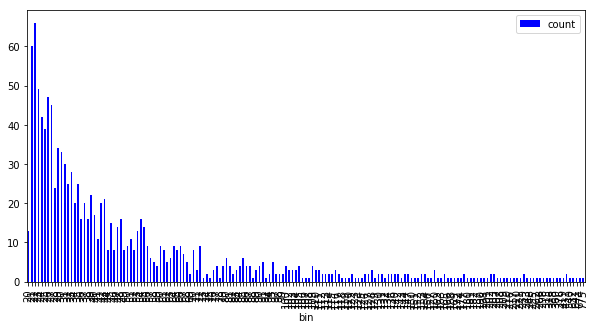

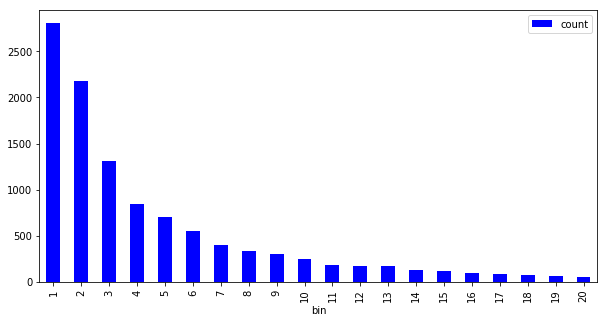

In [131]:
spark.sql("""
SELECT (UserReview_count < 200) common, CEIL(UserReview_count/10) bin, count(1) count FROM userProfile
GROUP BY (UserReview_count < 200), CEIL(UserReview_count/10)
ORDER BY common, bin
""").toPandas().groupby("common").plot(kind="bar", x="bin", y="count", figsize=(10,5), color="blue")

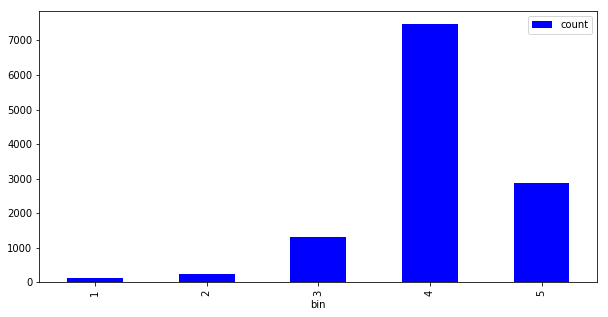

In [132]:
spark.sql("""
SELECT CEIL(average_stars) bin, count(1) count FROM userProfile
GROUP BY CEIL(average_stars)
ORDER BY bin
""").toPandas().plot(kind="bar", x="bin", y="count", figsize=(10,5), color="blue")

In [134]:
businessProfileDF = spark.sql("""
SELECT DISTINCT business_id, ResReview_count, city, state, bus_stars FROM citycombine
""")

In [135]:
businessProfileDF.createOrReplaceTempView("busProfile")

In [137]:
businessProfileDF.describe().toPandas()

,summary,business_id,ResReview_count,city,state,bus_stars
0,count,1798,1798,1798,1798,1798
1,mean,None,40.71579532814238,None,None,3.352892102335929
2,stddev,None,65.88985839908327,None,None,0.7285573066436942
3,min,-AVRReI-nfsa0lKlehEojw,3,Markham,BC,1.0
4,max,zxWbNs31PLO0DKBTY4L4Ig,700,Toronto,ON,5.0


common
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

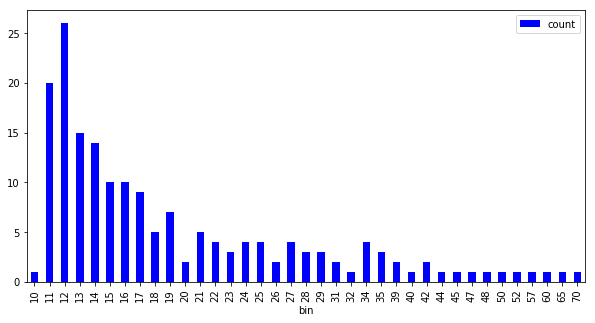

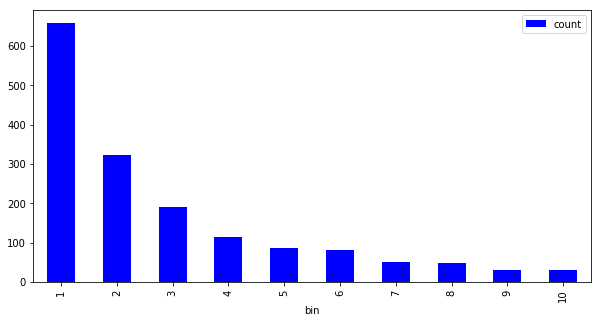

In [138]:
spark.sql("""
SELECT (ResReview_count < 100) common, CEIL(ResReview_count/10) bin, count(1) count FROM busProfile
GROUP BY (ResReview_count < 100), CEIL(ResReview_count/10)
ORDER BY common, bin
""").toPandas().groupby("common").plot(kind="bar", x="bin", y="count", figsize=(10,5), color="blue")

In [158]:
spark.sql("""
SELECT COUNT(business_id) count, city FROM busProfile
GROUP BY city
""").toPandas()

,count,city
0,82,Richmond Hill
1,1270,Toronto
2,126,Markham
3,258,Mississauga
4,62,North York


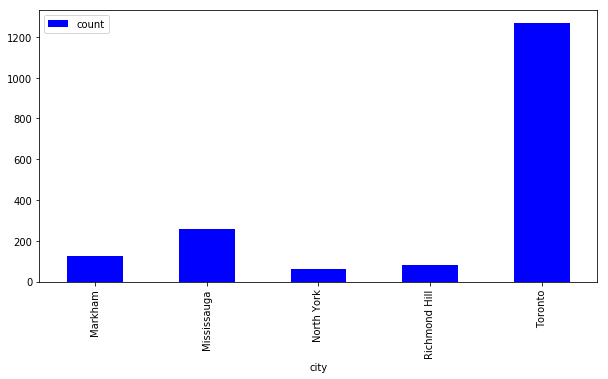

In [155]:
spark.sql("""
SELECT COUNT(business_id) count, city FROM busProfile
GROUP BY city
ORDER BY city
""").toPandas().plot(kind="bar", x="city", y="count", figsize=(10,5), color="blue")

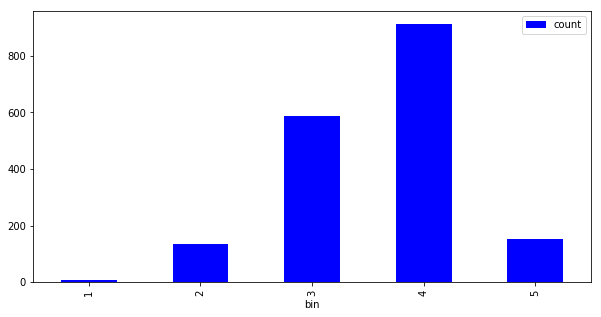

In [156]:
spark.sql("""
SELECT CEIL(bus_stars) bin, count(1) count FROM busProfile
GROUP BY CEIL(bus_stars)
ORDER BY bin
""").toPandas().plot(kind="bar", x="bin", y="count", figsize=(10,5), color="blue")

In [142]:
reviewProfileDF.createOrReplaceTempView("reviewProfile")

In [143]:
reviewProfileDF.describe().toPandas()

,summary,review_id,business_id,user_id,rev_stars,date
0,count,45047,45047,45047,45047,45047
1,mean,None,None,None,3.575132639243457,None
2,stddev,None,None,None,1.1609140880508115,None
3,min,--0zXw3_ZjcRXPo3CRBKQw,-AVRReI-nfsa0lKlehEojw,--7gjElmOrthETJ8XqzMBw,1.0,2008-08-06 23:04:28
4,max,zzd6yae3FNXoXHOjQrDn_A,zxWbNs31PLO0DKBTY4L4Ig,zzo--VpSQh8PpsGVeMC1dQ,5.0,2018-11-14 17:43:19


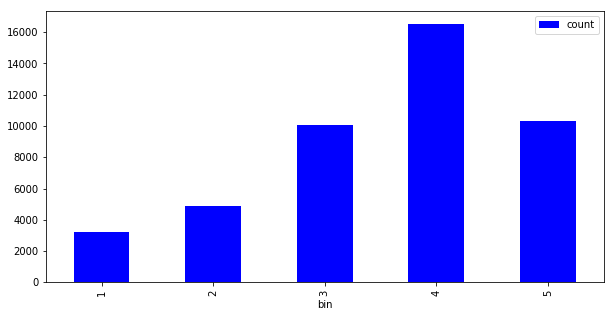

In [144]:
spark.sql("""
SELECT CEIL(rev_stars) bin, count(1) count FROM reviewProfile
GROUP BY CEIL(rev_stars)
ORDER BY bin
""").toPandas().plot(kind="bar", x="bin", y="count", figsize=(10,5), color="blue")